### EVALUATING STRATEGY
---

### Libraries

In [1]:
import statsmodels.formula.api as smf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

### Reading data

In [2]:
indicepanel = pd.read_csv('../data/indice/indicepanel.csv', index_col=0)
indicepanel.head()

,spy,spy_lag1,sp500,nasdaq,dji,cac40,daxi,aord,hsi,nikkei,Price
Date,,,,,,,,,,,
2008-01-04,-1.529998,-1.570008,-3.540039,-40.879883,2.43945,5.489746,-27.990235,-2.300293,515.349609,-464.320313,143.339996
2008-01-07,0.270004,-1.529998,-29.940064,-56.930176,-245.40918,-111.689941,-102.709961,-27.500000,216.951171,-48.830078,141.809998
2008-01-08,-2.990006,0.270004,1.640015,-7.179931,19.75000,44.509766,33.680176,-33.899902,-354.060547,99.370117,142.080002
2008-01-09,0.589997,-2.990006,-25.459961,-63.119873,-230.69043,-17.109864,-5.270020,-12.900390,768.359375,234.450195,139.089996
2008-01-10,1.100006,0.589997,16.530029,8.270019,142.90039,9.140137,-40.120117,-100.200196,-195.560547,-158.209961,139.679993


### Spliting

In [3]:
train = indicepanel.iloc[-2000:-1000, :]
test = indicepanel.iloc[-1000:, :]

### Model

In [4]:
formula = 'spy~spy_lag1+sp500+nasdaq+dji+cac40+aord+daxi+nikkei+hsi'
lm = smf.ols(formula=formula, data=train).fit()

In [5]:
train['PredictedY'] = lm.predict(train)
test['PredictedY'] = lm.predict(test)

### Profit of signal-based strategy

In [6]:
# train
train['Order'] = [1 if sig>0 else -1 for sig in train['PredictedY']]
train['Profit'] = train['spy'] * train['Order']

train['Wealth'] = train['Profit'].cumsum()
print('Total profit made in train: ', train['Profit'].sum())

Total profit made in train:  214.34009500000042


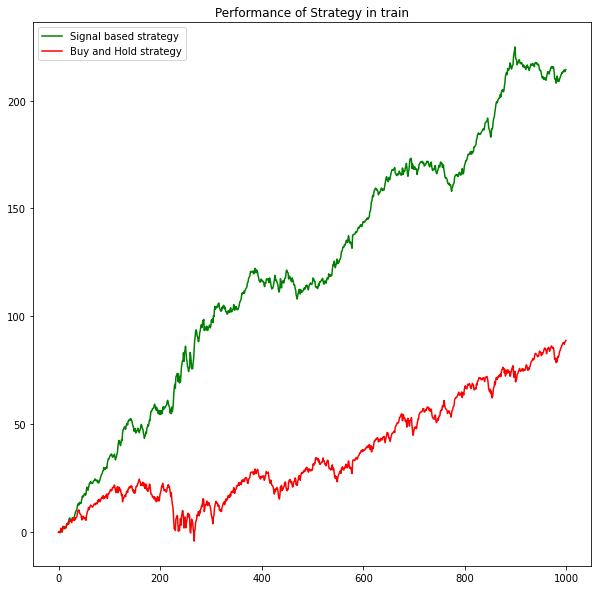

In [7]:
plt.figure(figsize=(10, 10))
plt.title('Performance of Strategy in train')
plt.plot(train['Wealth'].values, color='green', label='Signal based strategy')
plt.plot(train['spy'].cumsum().values, color='red', label='Buy and Hold strategy')
plt.legend()
plt.show()

In [8]:
# test
test['Order'] = [1 if sig>0 else -1 for sig in test['PredictedY']]
test['Profit'] = test['spy'] * test['Order']

test['Wealth'] = test['Profit'].cumsum()
print('Total profit made in test: ', test['Profit'].sum())

Total profit made in test:  241.0300879999996


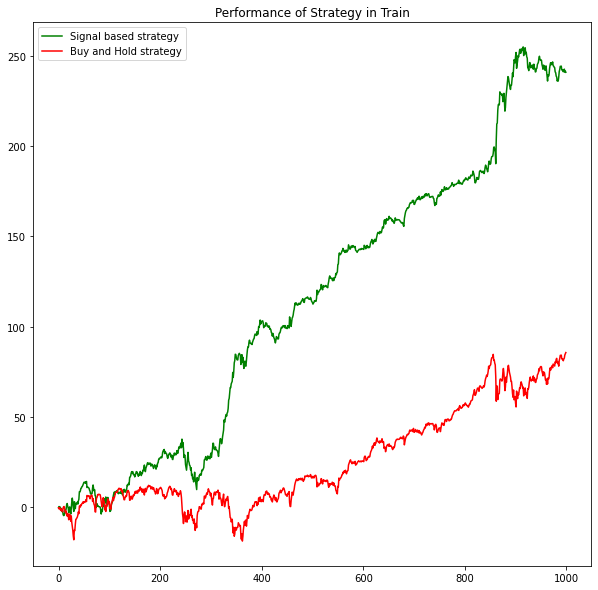

In [9]:
plt.figure(figsize=(10, 10))
plt.title('Performance of Strategy in Train')
plt.plot(test['Wealth'].values, color='green', label='Signal based strategy')
plt.plot(test['spy'].cumsum().values, color='red', label='Buy and Hold strategy')
plt.legend()
plt.show()

### Evaluation of model - Pratical standard

We introduce two common practical standards - Sharpe Ratio, Maximum Drawdown to evaluate our model performance

In [10]:
train['Wealth'] = train['Wealth'] + train.loc[train.index[0], 'Price']
test['Wealth'] = test['Wealth'] + test.loc[test.index[0], 'Price']

In [11]:
# Sharpe Ratio on train data
train['Return'] = np.log(train['Wealth']) - np.log(train['Wealth'].shift(1))
dailyr = train['Return'].dropna()

print('Daily Sharpe Ratio is ', dailyr.mean()/dailyr.std(ddof=1))
print('Yearly Sharpe Ratio is ', (252**0.5)*dailyr.mean()/dailyr.std(ddof=1))

Daily Sharpe Ratio is  0.17965076303258012
Yearly Sharpe Ratio is  2.851867450963218


In [12]:
# Sharpe Ratio in test data
test['Return'] = np.log(test['Wealth']) - np.log(test['Wealth'].shift(1))
dailyr = test['Return'].dropna()

print('Daily Sharpe Ratio is ', dailyr.mean()/dailyr.std(ddof=1))
print('Yearly Sharpe Ratio is ', (252**0.5)*dailyr.mean()/dailyr.std(ddof=1))

Daily Sharpe Ratio is  0.13035126208575046
Yearly Sharpe Ratio is  2.06926213537379


In [13]:
# Maximum Drawdown in train data
train['Peak'] = train['Wealth'].cummax()
train['Drawdown'] = (train['Peak'] - train['Wealth'])/train['Peak']
print('Maximum Drawdown in train is ', train['Drawdown'].max())

Maximum Drawdown in train is  0.06069016443644383


In [14]:
# Maximum Drawdown in test data
test['Peak'] = test['Wealth'].cummax()
test['Drawdown'] = (test['Peak'] - test['Wealth'])/test['Peak']
print('Maximum Drawdown in test is ', test['Drawdown'].max())

Maximum Drawdown in test is  0.11719899524631659
